## Project 2.0 using Keras [Neural Network]

In [92]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

## Processing Input and Label Data

In [93]:
def processData(dataset):
    
    Feature = pd.read_csv('GSC-Features.csv', index_col=False)
    Samepair = pd.read_csv('same_pairs.csv')
    Samepair = Samepair.sample(10000)
    data = pd.merge(left=Samepair, right=Feature, left_on='img_id_A', right_on='img_id')
    newdata = pd.merge(left=data, right=Feature, left_on='img_id_B', right_on='img_id')   
    newdata = newdata.drop(['img_id_A','img_id_B'], axis = 1)

    Feature = pd.read_csv('GSC-Features.csv', index_col=False)
    Diffpair = pd.read_csv('diffn_pairs.csv')
    Diffpair = Diffpair.sample(10000)
    data = pd.merge(left=Diffpair, right=Feature, left_on='img_id_A', right_on='img_id')
    newdata1 = pd.merge(left=data, right=Feature, left_on='img_id_B', right_on='img_id')
    newdata1 = newdata1.drop(['img_id_A','img_id_B'], axis = 1)

    frames = [newdata, newdata1]
    Hdata = pd.concat(frames)
    Hdatanew = shuffle(Hdata)
    t = Hdatanew['target']
    t = t.as_matrix()
    Hdata2 = Hdatanew.drop(['target'], axis = 1)
    Hdata2 = Hdata2.loc[:, ~Hdata2.columns.str.contains('^img_id')]


    processedLabel = np.matrix(t)
    processedLabel = np.transpose(processedLabel)
    processedData = np.matrix(Hdata2)

    return processedData, processedLabel

In [94]:
from keras.utils import np_utils

def encodeLabel(labels):
    return np_utils.to_categorical(np.array(processedLabel))

## Create Testing Datasets

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 1024
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes  = 128
third_dense_layer_nodes  = 2

def get_model():
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.summary()

    model.compile(optimizer='adamax',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Model</font>

In [96]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_46 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               65664     
_________________________________________________________________
activation_47 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 258       
__________

# <font color = blue>Run Model</font>

In [98]:
validation_data_split = 0.2
num_epochs = 100
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('GSC-Features.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
processedLabel = encodeLabel(processedLabel)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

(10000, 1027)
(10000, 1027)
(20000, 1027)


C:\Users\sagni\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]
(20000, 1)
Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 3s 172us/step - loss: 0.5223 - acc: 0.8206 - val_loss: 0.3616 - val_acc: 0.8455
Epoch 2/100
16000/16000 [==============================] - 3s 172us/step - loss: 0.3659 - acc: 0.8454 - val_loss: 0.3470 - val_acc: 0.8530
Epoch 3/100
16000/16000 [==============================] - 3s 172us/step - loss: 0.3245 - acc: 0.8633 - val_loss: 0.3403 - val_acc: 0.8642
Epoch 4/100
16000/16000 [==============================] - 3s 169us/step - loss: 0.2913 - acc: 0.8788 - val_loss: 0.3314 - val_acc: 0.8582
Epoch 5/100
16000/16000 [==============================] - 3s 171us/step - loss: 0.2661 - acc: 0.8935 - val_loss: 0.3342 - val_acc: 0.8762
Epoch 6/100
16000/16000 [==============================] - 3s 171us/step - loss: 0.2380 - acc: 0.9045 - val_loss: 0.3368 - val_acc: 0.8752
Epoch 7/100
16000/16000 [==============================] - 3s 176us/st

Epoch 59/100
16000/16000 [==============================] - 3s 174us/step - loss: 0.0196 - acc: 0.9969 - val_loss: 0.6450 - val_acc: 0.8815
Epoch 60/100
16000/16000 [==============================] - 3s 172us/step - loss: 0.0191 - acc: 0.9974 - val_loss: 0.6150 - val_acc: 0.8802
Epoch 61/100
16000/16000 [==============================] - 3s 179us/step - loss: 0.0197 - acc: 0.9965 - val_loss: 0.5597 - val_acc: 0.8868
Epoch 62/100
16000/16000 [==============================] - 3s 184us/step - loss: 0.0187 - acc: 0.9971 - val_loss: 0.5793 - val_acc: 0.8835
Epoch 63/100
16000/16000 [==============================] - 3s 171us/step - loss: 0.0166 - acc: 0.9976 - val_loss: 0.6225 - val_acc: 0.8845
Epoch 64/100
16000/16000 [==============================] - 3s 172us/step - loss: 0.0146 - acc: 0.9985 - val_loss: 0.6063 - val_acc: 0.8862
Epoch 65/100
16000/16000 [==============================] - 3s 171us/step - loss: 0.0162 - acc: 0.9976 - val_loss: 0.6067 - val_acc: 0.8848
Epoch 66/100
16000/1

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016000D90668>,
      dtype=object)

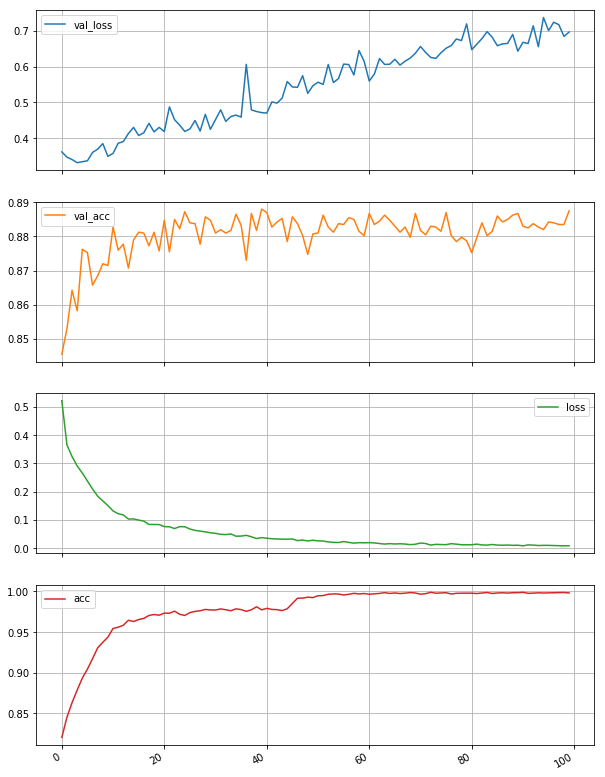

In [99]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))